# IA

In [44]:
import pandas
import seaborn
import numpy as np

In [87]:
dataset = pandas.read_csv('datasets\cs.csv')
dataset = dataset.dropna(axis=0)
dataset = pandas.get_dummies(dataset, columns=["map"])

In [46]:
X = dataset.loc[:, dataset.columns != 'round_winner'] 
y = np.array(dataset.loc[:, dataset.columns == 'round_winner']).ravel()

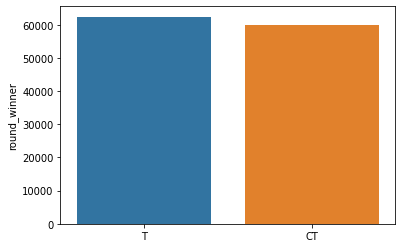

In [47]:
# para plotar a proporção das classes, primeiro contamos os valores da coluna 'target' e transformamos em um frame
class_distribuition = pandas.DataFrame(dataset['round_winner'].value_counts())
# usamos o frame criado acima para plot a frequencia de cada classe no dataset
seaborn.barplot(x = class_distribuition.index, y='round_winner', data = class_distribuition)

class_ratio = class_distribuition['round_winner'][0]/class_distribuition['round_winner'][1]

if (0.9 < class_ratio < 1.1):
    scoring_choosed = "accuracy"
else:
    scoring_choosed = "balanced_accuracy"

In [48]:
# # importa o método do sklearn que separa em conjunto de treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [49]:
# importa metodos de classicacao
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [50]:
# instancia os classificador 
DTC = DecisionTreeClassifier()
KNN = KNeighborsClassifier()
GNB = GaussianNB()
MLP = MLPClassifier()

In [51]:
DTC_parameters = {'criterion' : ['gini','entropy','log_loss'], 'random_state' : [42]}
KNN_parameters = {'n_neighbors' : [1, 3, 5, 7, 9, 11, 13], 'weights' : ['uniform', 'distance']}
GNB_parameters = {}
MLP_parameters = {'hidden_layer_sizes' : [(5), (8), (15), (5, 3), (8, 5), (10, 5)], 'max_iter' : [3000], 'random_state' : [42]}

In [52]:
GS_DTC = GridSearchCV(DTC, DTC_parameters, cv = 10, scoring = scoring_choosed)
GS_KNN = GridSearchCV(KNN, KNN_parameters, cv = 10, scoring = scoring_choosed)
GS_GNB = GridSearchCV(GNB, GNB_parameters, cv = 10, scoring = scoring_choosed)
GS_MLP = GridSearchCV(MLP, MLP_parameters, cv = 10, scoring = scoring_choosed)

In [53]:
# treina o classificador com o conjunto de treino
GS_DTC.fit(X_train, y_train)
GS_KNN.fit(X_train, y_train)
GS_GNB.fit(X_train, y_train)
GS_MLP.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [5, 8, 15, (5, 3), (8, 5),
                                                (10, 5)],
                         'max_iter': [3000], 'random_state': [42]},
             scoring='accuracy')

In [79]:
results_DTC = pandas.DataFrame(GS_DTC.cv_results_)
results_KNN = pandas.DataFrame(GS_KNN.cv_results_)
results_GNB = pandas.DataFrame(GS_GNB.cv_results_)
results_MLP = pandas.DataFrame(GS_MLP.cv_results_)

In [55]:
view = ['params', 'mean_test_score','std_test_score', 'rank_test_score']
results_DTC = results_DTC[view].sort_values(by='rank_test_score')
results_KNN = results_KNN[view].sort_values(by='rank_test_score')
results_GNB = results_GNB[view].sort_values(by='rank_test_score')
results_MLP = results_MLP[view].sort_values(by='rank_test_score')

In [56]:
print(f'A acurácia do Classificador DTC é: {results_DTC["mean_test_score"][0] :.2%}')
print(f'A acurácia do Classificador KNN é: {results_KNN["mean_test_score"][0] :.2%}')
print(f'A acurácia do Classificador GNB é: {results_GNB["mean_test_score"][0] :.2%}')
print(f'A acurácia do Classificador MLP é: {results_MLP["mean_test_score"][0] :.2%}')

A acurácia do Classificador DTC é: 81.14%
A acurácia do Classificador KNN é: 80.07%
A acurácia do Classificador GNB é: 73.08%
A acurácia do Classificador MLP é: 74.38%


In [72]:
algs = [] 

algs.append({"name": "DTC", "results": results_DTC})
algs.append({"name": "KNN", "results": results_KNN})
algs.append({"name": "GNB", "results": results_GNB})
algs.append({"name": "MLP", "results": results_MLP})

algs.sort(key = lambda acc : acc["results"]["mean_test_score"][0], reverse = True)

for alg in algs:
    print(alg["name"], alg["results"]["mean_test_score"][0], alg["results"]["std_test_score"][0])


DTC 0.8114195403076213 0.003375993372504895
KNN 0.800701424913961 0.004137281574836442
MLP 0.7437560389826577 0.005245101829513755
GNB 0.7307504629125368 0.00551220441167607


In [85]:
from math import sqrt

media_err_A0 = 1 - algs[0]["results"]["mean_test_score"][0]
dp_A0 = algs[0]["results"]["std_test_score"][0]

media_err_A1 = 1 - algs[1]["results"]["mean_test_score"][0]
dp_A1 = algs[1]["results"]["std_test_score"][0]

dif_media_err = media_err_A0 - media_err_A1
desvio_padrao = sqrt( (dp_A0**2 + dp_A1**2) / 2.0 )
diferenca_absoluta = dif_media_err / desvio_padrao

In [86]:
print(f'Os dois melhores algoritmos foram {algs[0]["name"]} e {algs[1]["name"]}')
print(f'\tdif_media_err = {dif_media_err}')
print(f'\tdesvio_padrao = {desvio_padrao}')
print(f'\tdiferenca_absoluta = {diferenca_absoluta}')

if diferenca_absoluta > 0:
    if diferenca_absoluta >= 0.02:
        print(f'{algs[1]["name"]} tem melhor performance que {algs[0]["name"]} com nível de confiança de 95%')
    else:
        print(f'{algs[1]["name"]} tem melhor performance que {algs[0]["name"]}')
else:
    if diferenca_absoluta <= 0.02:
        print(f'{algs[0]["name"]} tem melhor performance que {algs[1]["name"]} com nível de confiança de 95%')
    else:
        print(f'{algs[0]["name"]} tem melhor performance que {algs[1]["name"]}')

Os dois melhores algoritmos foram DTC e KNN
	dif_media_err = -0.010718115393660299
	desvio_padrao = 0.003775872752138112
	diferenca_absoluta = -2.8385796072156024
DTC tem melhor performance que KNN com nível de confiança de 95%
